# WeatherPy

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

In [4]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1    
    
    try:
        
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date 
             })
    except:
        print("City not found. Skipping ...")
        pass  
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | north battleford
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | saipan
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | tolanaro
Processing Record 6 of Set 1 | bad segeberg
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | nar'yan-mar
Processing Record 14 of Set 1 | rawson
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | sittwe
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | codajas
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | susuman
Processing Record 22 of Set 1 | ir

Processing Record 36 of Set 4 | alice springs
Processing Record 37 of Set 4 | hawaiian paradise park
Processing Record 38 of Set 4 | vilyuchinsk
Processing Record 39 of Set 4 | noumea
Processing Record 40 of Set 4 | rovaniemi
Processing Record 41 of Set 4 | balabac
Processing Record 42 of Set 4 | tosya
Processing Record 43 of Set 4 | san luis
Processing Record 44 of Set 4 | sao joao da barra
Processing Record 45 of Set 4 | solnechnyy
Processing Record 46 of Set 4 | kapa'a
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | bei'an
Processing Record 49 of Set 4 | olinda
Processing Record 0 of Set 5 | atbara
Processing Record 1 of Set 5 | lazaro cardenas
Processing Record 2 of Set 5 | olyokminsk
Processing Record 3 of Set 5 | lembar
City not found. Skipping ...
Processing Record 4 of Set 5 | jokioinen
Processing Record 5 of Set 5 | nkhotakota
Processing Record 6 of Set 5 | port mathurin
Processing Record 7 of Set 5 | dzerzhinskoye
Processing Record 8 of Set 5 | lejani

Processing Record 27 of Set 8 | mochudi
Processing Record 28 of Set 8 | chonchi
Processing Record 29 of Set 8 | devinuwara
City not found. Skipping ...
Processing Record 30 of Set 8 | menongue
Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | belyy yar
Processing Record 33 of Set 8 | tucurui
Processing Record 34 of Set 8 | villa gesell
Processing Record 35 of Set 8 | naze
Processing Record 36 of Set 8 | rio grande
Processing Record 37 of Set 8 | aykol
City not found. Skipping ...
Processing Record 38 of Set 8 | byron bay
Processing Record 39 of Set 8 | ortona
Processing Record 40 of Set 8 | holly hill
Processing Record 41 of Set 8 | mbala
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | mawlamyine
Processing Record 44 of Set 8 | opuwo
Processing Record 45 of Set 8 | al hudaydah
Processing Record 46 of Set 8 | hadibu
Processing Record 47 of Set 8 | viana
Processing Record 48 of Set 8 | ujae
Processing Record 49 of Set 8 | arno
Processing Rec

Processing Record 18 of Set 12 | puerto armuelles
Processing Record 19 of Set 12 | brandon
Processing Record 20 of Set 12 | leava
Processing Record 21 of Set 12 | rawai
Processing Record 22 of Set 12 | kanniyakumari
Processing Record 23 of Set 12 | al burayqah
Processing Record 24 of Set 12 | kushalnagar
Processing Record 25 of Set 12 | kyaikkami
Processing Record 26 of Set 12 | bure
Processing Record 27 of Set 12 | port douglas
Processing Record 28 of Set 12 | kousseri
Processing Record 29 of Set 12 | ambon
Processing Record 30 of Set 12 | kyzyl
Processing Record 31 of Set 12 | isiro
Processing Record 32 of Set 12 | maitum
Processing Record 33 of Set 12 | port macquarie
Processing Record 34 of Set 12 | maun
Processing Record 35 of Set 12 | wewak
Processing Record 36 of Set 12 | gwadar
Processing Record 37 of Set 12 | sakaiminato
Processing Record 38 of Set 12 | zhangzhou
Processing Record 39 of Set 12 | geraldton
Processing Record 40 of Set 12 | bel ombre
Processing Record 41 of Set 1

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Windspeed     591
Country       591
Date          591
dtype: int64

In [15]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,north battleford,52.7834,-108.2847,58.41,71,40,13.80,CA,1689600192
1,adamstown,-25.0660,-130.1015,71.56,64,100,13.27,PN,1689600026
2,saipan,15.1355,145.7010,83.10,100,20,9.22,MP,1689600046
3,albany,42.6001,-73.9662,75.38,94,0,1.01,US,1689600045
4,tolanaro,-25.0319,46.9987,75.27,64,20,6.91,MG,1689600395


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,north battleford,52.7834,-108.2847,58.41,71,40,13.80,CA,1689600192
1,adamstown,-25.0660,-130.1015,71.56,64,100,13.27,PN,1689600026
2,saipan,15.1355,145.7010,83.10,100,20,9.22,MP,1689600046
3,albany,42.6001,-73.9662,75.38,94,0,1.01,US,1689600045
4,tolanaro,-25.0319,46.9987,75.27,64,20,6.91,MG,1689600395


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

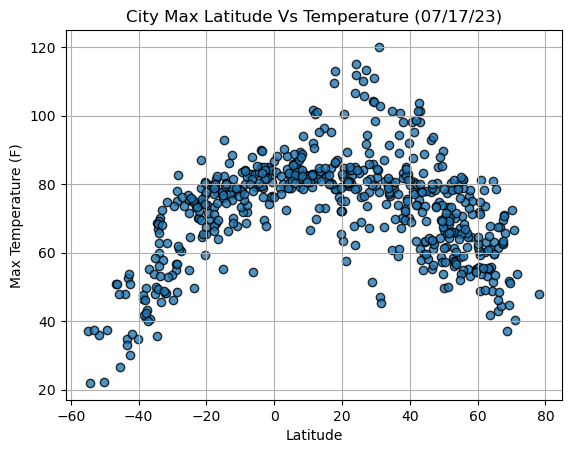

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude Vs Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

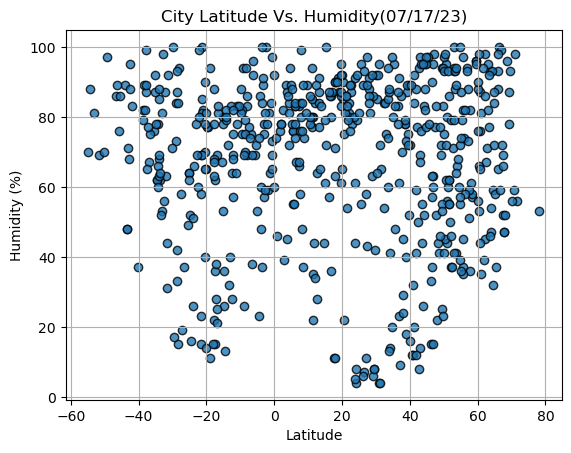

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

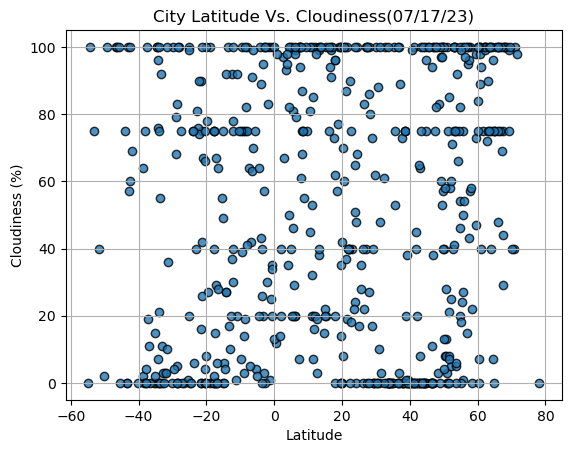

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

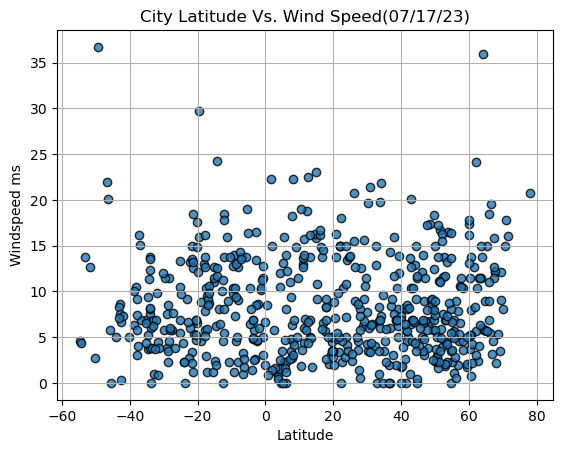

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed ms")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,north battleford,52.7834,-108.2847,58.41,71,40,13.80,CA,1689600192
2,saipan,15.1355,145.7010,83.10,100,20,9.22,MP,1689600046
3,albany,42.6001,-73.9662,75.38,94,0,1.01,US,1689600045
5,bad segeberg,53.9333,10.3167,65.86,66,92,16.44,DE,1689600396
6,olonkinbyen,70.9221,-8.7187,40.39,98,100,17.83,SJ,1689600114


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,71.56,64,100,13.27,PN,1689600026
4,tolanaro,-25.0319,46.9987,75.27,64,20,6.91,MG,1689600395
7,port-aux-francais,-49.3500,70.2167,37.49,97,100,36.71,TF,1689600041
9,blackmans bay,-43.0167,147.3167,52.52,71,100,8.66,AU,1689600043
10,puerto natales,-51.7236,-72.4875,36.05,69,40,12.66,CL,1689600048


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.5841294849581377


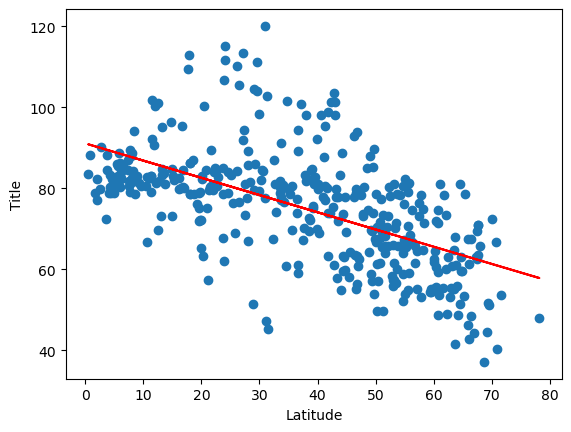

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8257571788679007


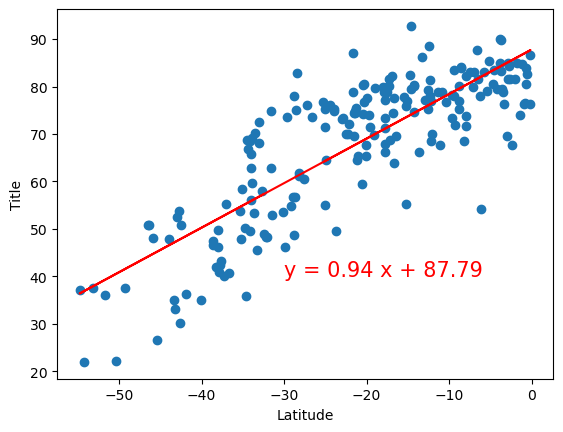

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.04589304371717961


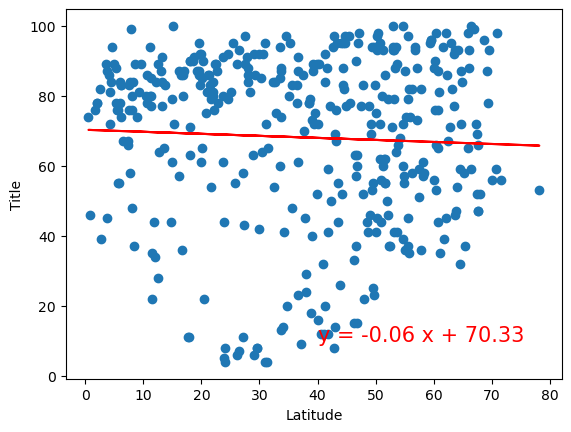

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.05883859719536661


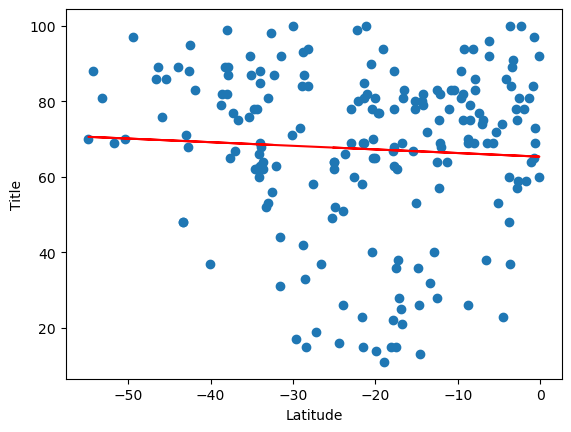

In [32]:
# Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04489014668623744


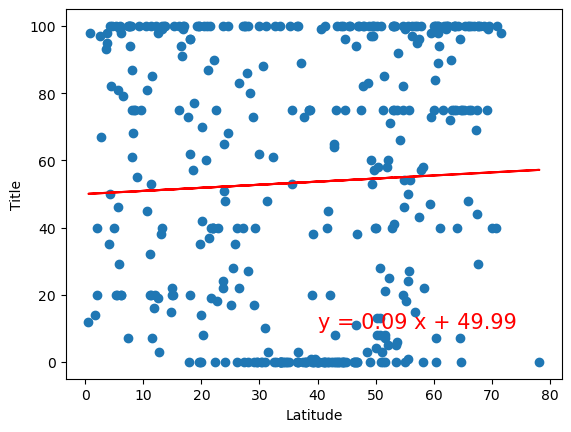

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.06717427775336131


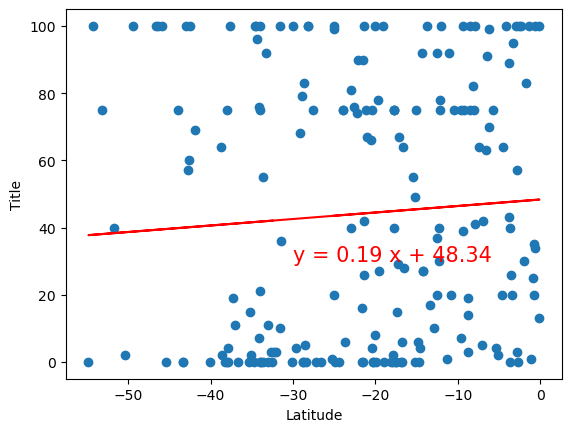

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.059827950849375644


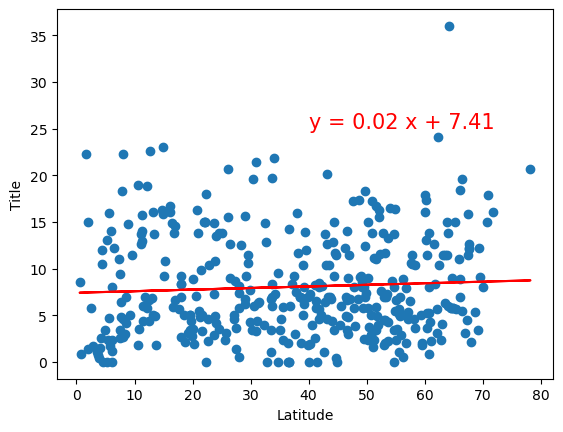

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: 0.015254111420237235


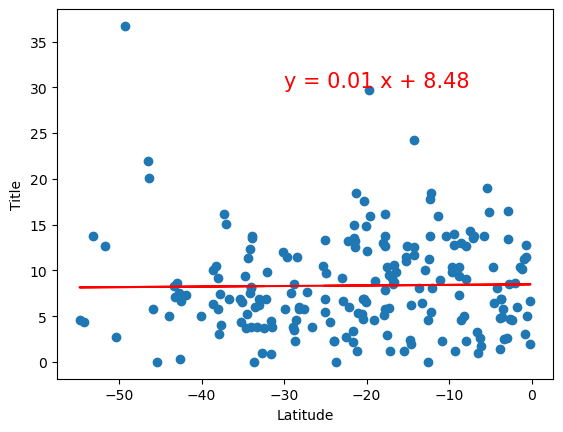

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE